In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
from collections import namedtuple
# Used with sklearn.linear_model.LinearRegression
# A set of K dim N vectors, K points with N features each
# data: 2d numpy array with shape (K, N)
# targets: numpy array with shape (K), the values to regress on
# Use as LinearRegression.fit(train_data, train_targets)
regrData = namedtuple('regrData', 'train_data train_targets test_data test_targets')
lin_rgr = namedtuple('lin_rgr', 'regrData intercept coeffs train_pred test_pred, train_err, test_err')

In [3]:
def regrData_Sinus(stDev:float=0.05, offset:float = 1.1, freq:float=10,
          num_train:int=100, seed_train:int=1234,
          num_test:int=None, seed_test:int=None,
          max_power:int=15):
    '''fuzzy sin data and poly kernel'''
    np.random.seed(seed_train)
    xR = np.array([offset + i * freq/num_train for i in range(0, num_train)])
    yR = np.random.normal(0, stDev, num_train) + np.sin(xR)
    # xR is XR[:, 0]
    XR = np.array( [xR ** i for i in range(1, max_power)]).T
    
    if num_test is None:
        num_test = num_train
    if seed_test is None:
        seed_test = seed_train + 77
        
    xT = np.array([offset + i * freq/num_test for i in range(0, num_test)])
    XT = np.array( [xT ** i for i in range(1, max_power)]).T
    yT = np.random.normal(0, stDev, num_test) + np.sin(xT)  
        
    return regrData(train_data=XR, train_targets=yR, test_data=XT, test_targets=yT)

In [10]:
sinusData = regrData_Sinus(num_train=200, num_test=30, stDev=0.25, freq=20)
Xr = sinusData.train_data
yr = sinusData.train_targets
xr = Xr[:, 0]
Xs = sinusData.test_data
xs = Xs[:, 0]
ys = sinusData.test_targets

linreg = LinearRegression(normalize=True)
linreg.fit(Xr, yr)

yr_pred = linreg.predict(Xr)
ys_pred = linreg.predict(Xs)

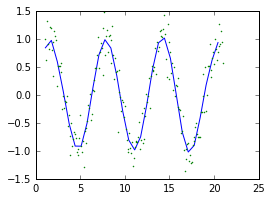

In [11]:
lrResults = lin_rgr(regrData = sinusData,
                 intercept = linreg.intercept_,
                 coeffs = linreg.coef_,
                 train_pred = yr_pred,
                 test_pred = ys_pred,
                 train_err = sum((yr_pred-yr)**2),
                 test_err = sum((ys_pred-ys)**2))

rcParams['figure.figsize'] = 4, 3
plt.plot(lrResults.regrData.test_data[:,0], lrResults.test_pred)
plt.plot(xr, yr,'.', markersize=2)
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 5
numPoints = 800
stdev = 0.5
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([1. + i * 48./numPoints for i in range(0, numPoints)])
np.random.seed(190)  #Setting seed for reproducability
y = np.random.normal(0, stdev, len(x)) + np.sin(x)
data = pd.DataFrame(np.column_stack([x,y]),columns=['x_1','y'])
plt.plot(data['x_1'], data['y'],'.', markersize=500/numPoints)
plt.show()

In [ ]:
maxpower = 44
powerRange = range(1, maxpower)
for i in powerRange:  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x_1']**i
    
#print(data.head())

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    predictors = ['x_%d'%i for i in range(1, power+1)]
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred)
        plt.plot(data['x_1'], data['y'],'.', markersize=1000/numPoints)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    return [sum((y_pred-data['y'])**2)] + [linreg.intercept_] + list(linreg.coef_)

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in powerRange]
ind = ['model_pow_%d'%i for i in powerRange]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {8:231,12:232,20:233,28:234,36:235,42:236}

#Iterate through all powers and assimilate results
rcParams['figure.figsize'] = 12, 10
for i in powerRange:
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
coef_matrix_simple